## Observations and Insights 

* Capomulin was effective in reducing the volume of the SCC tumor in a 45 day period when plotting data for one mouse 
![LineChart](Figures/LineChart.png)

* Based on the average final SCC tumor volume for the four drug regimens of interest (i.e. Capomulin, Ramicane, Infubinol, and Ceftamin), Capomuline and Ramicane suggested are both the most effective.
![Box and Whisker](Figures/BoxWhiskerPlot.png)

* Mouse weight strongly correlates (R-squared is 0.84) with the average SCC tumor volume for mice on the the Capomulin treatment. Therefore, the mouse weight needs to be another controlled variable to prevent skewing the results when comparing treatments.
![Regression](Figures/ScatterWeightTumorVolRegression.png)

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
total_mice = mouse_metadata['Mouse ID'].count()
total_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"])]

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_data.loc[combined_data["Mouse ID"]=="g989"]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop(index=dup_mouse.index)


In [9]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_data['Mouse ID'].unique())
total_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Initialize lists
regimens = clean_data["Drug Regimen"].unique()
mean_vol = []
median_vol = []
var_vol = []
std_vol = []
sems = []

# Iterate through the different treatments to calculate the summary statistics
for regimen in regimens:
    df = clean_data[clean_data["Drug Regimen"]==regimen]
    mean_vol.append(df["Tumor Volume (mm3)"].mean())
    median_vol.append(df["Tumor Volume (mm3)"].median())
    var_vol.append(np.var(df["Tumor Volume (mm3)"],ddof=0))
    std_vol.append(np.std(df["Tumor Volume (mm3)"],ddof=0))
    sems.append(st.sem(df["Tumor Volume (mm3)"]))

# Create a dataframe for the summary statistics
summ_stats_df = pd.DataFrame({
    "Drug Regimen":regimens,
    "Mean Volume": mean_vol,
    "Median Volume": median_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "Standard Error": sems
})

summ_stats_df

,Drug Regimen,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
5,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
6,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
7,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
8,Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

regimen_df = clean_data.groupby(['Drug Regimen'])

# Use the grouped object to calculate the summary statistics
mean_vol = regimen_df["Tumor Volume (mm3)"].mean()
median_vol = regimen_df["Tumor Volume (mm3)"].median()
var_vol = regimen_df["Tumor Volume (mm3)"].var(ddof=0)
std_vol = regimen_df["Tumor Volume (mm3)"].std(ddof=0)
sems = regimen_df["Tumor Volume (mm3)"].sem()

# Create a dataframe for the summary statistics
summ_stats_df = pd.DataFrame({
    "Mean Volume": mean_vol,
    "Median Volume": median_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "Standard Error": sems
})

summ_stats_df

,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar and Pie Charts

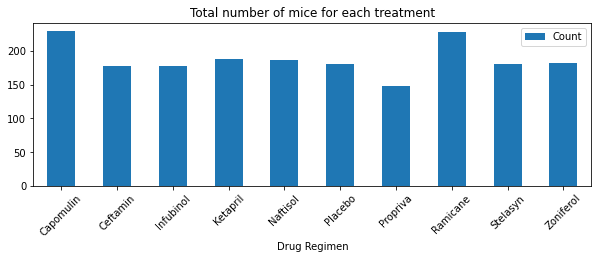

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Create a dataframe indexed by drug treatment to use pandas bar plotting
regimen_count = regimen_df['Mouse ID'].count()
bar_data_df = pd.DataFrame({
    "Count":regimen_count
})

bar_data_df.plot(kind='bar',figsize=(10,3),rot=45,width=0.5)
plt.title("Total number of mice for each treatment")

# Save the figure
plt.savefig("Figures/PandaBarChart.png")
plt.show()

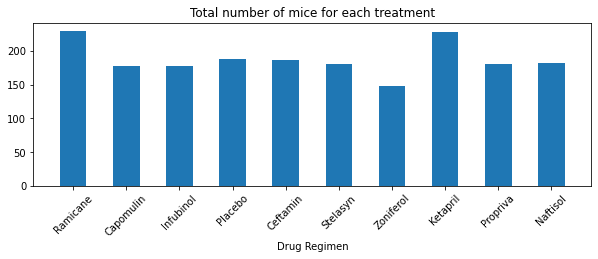

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.figure(figsize=(10,3))
plt.bar(regimens,regimen_count,align='center',width=0.5)
plt.xticks(rotation=45)
plt.xlim(-0.75,len(regimens)-0.25)
plt.ylim(0, max(regimen_count)*1.05)

# Set title and labels
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")

#Save figure
plt.savefig("Figures/PyplotBarChart.png")
plt.show()

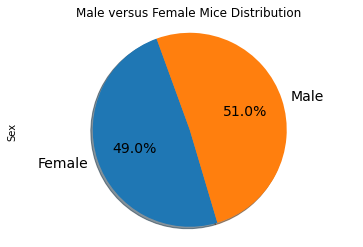

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get count of female and male mice
gender_data = clean_data.groupby('Sex')
gender_count = gender_data['Sex'].count()

# Create dataframe to count the distribution of female and male mice
gender_count_df = pd.DataFrame(gender_count)

gender_count_df.plot(kind='pie', y="Sex", title= "Male versus Female Mice Distribution", autopct='%1.1f%%', startangle= 110,shadow=True, fontsize=14,legend =False)
plt.axis("equal")

# Save figure
plt.savefig("Figures/PandaPieChart.png")
plt.show()

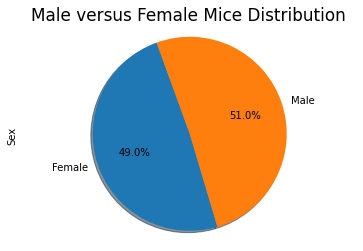

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the count for male and female mice into an array
genders = gender_count_df.index.values

plt.pie(gender_count,labels=genders, autopct="%1.1f%%", shadow=True, startangle=110)
plt.rcParams['font.size'] = 14
plt.title("Male versus Female Mice Distribution")
plt.ylabel("Sex")
plt.axis("equal")

# Save figure
plt.savefig("figures/PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouseid_df = clean_data.groupby(["Mouse ID"])
tumor_data = mouseid_df.last()
tumor_data


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
max_tumor_vol = []


for treatment in treatments:
    temp_df = tumor_data[tumor_data["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_tumor_vol.append(list(temp_df))
    
    # Calculate the quartiles
    quartiles =  temp_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    print(f"{treatment} potential outliers: {temp_df[(temp_df < lower_bound) | (temp_df > upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


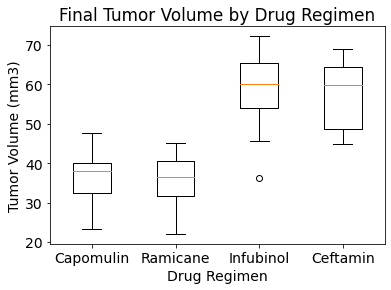

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(max_tumor_vol)
plt.xticks([1,2,3,4],treatments)

# Save the figure
plt.savefig("Figures/BoxWhiskerPlot.png")
plt.show()

## Line and Scatter Plots

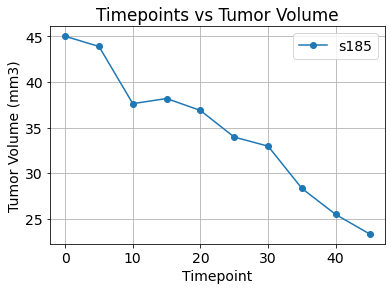

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter the original dataframe to only include Campomuline data
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Create capomuline dataframe that only has data for Mouse ID s185
capomulin_data_1 = capomulin_data[capomulin_data['Mouse ID']=="s185"]

# List comprehension to define the x and y axes
timepoints = [value for value in capomulin_data_1['Timepoint']]
tumor_vol = [value for value in capomulin_data_1['Tumor Volume (mm3)']]

plt.plot(timepoints,tumor_vol,marker='o',label='s185')
plt.legend(loc="best")
plt.title("Timepoints vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.savefig("Figures/LineChart.png")
plt.show()

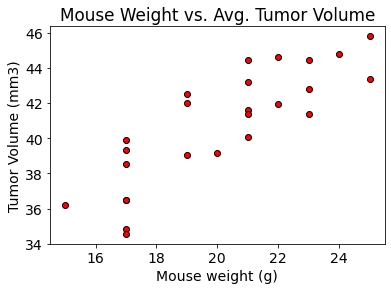

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Group by Mouse ID to collect weight and average tumor volume for each mouse on Capomulin
capomulin_mouse_id = capomulin_data.groupby(['Mouse ID'])
mouse_weight = capomulin_mouse_id["Weight (g)"].mean()
tumor_vol = round(capomulin_mouse_id["Tumor Volume (mm3)"].mean(),3)

plt.scatter(mouse_weight,
            tumor_vol,
            marker='o',
            facecolors='r',
            edgecolors='black')

plt.title("Mouse Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Save the figure
plt.savefig("Figures/ScatterWeightTumorVol.png")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


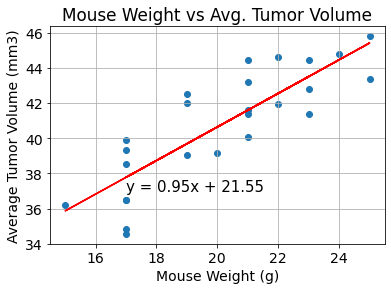

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight,tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")

plt.title("Mouse Weight vs Avg. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

# Save the figure
plt.savefig("Figures/ScatterWeightTumorVolRegression.png")
plt.show()